## Small Truss

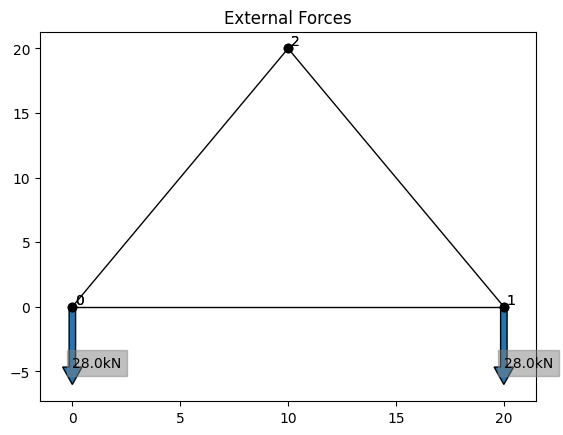

F_0_1 = 0.0
F_0_2 = 0.0
N_0_y = 28.0
N_0_x = 0.0
F_1_2 = 0.0
N_1_y = 28.0


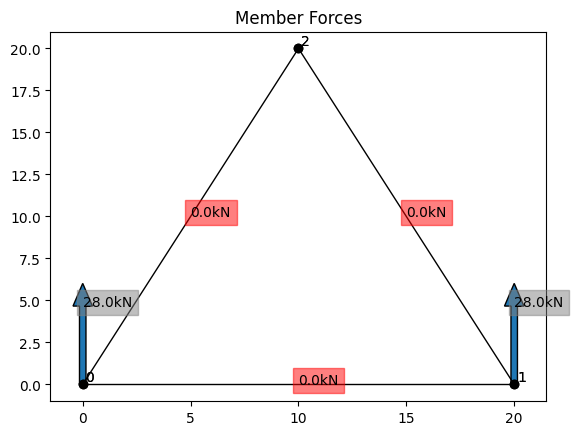

In [1]:
from truss import *

TRAIN_WEIGHT_PER_M = 4 # kN/m
BRIDGE_LENGTH = 14 # m

joints = [
    Joint(JointType.PIN, 0, 0, grounded=True),  # 0
    Joint(JointType.ROLLER, 20, 0, grounded=True), # 1
    Joint(JointType.GUSSET, 10, 20)] # 2
links = [Link(0,1), Link(0,2), Link(1,2)]

train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1])
forces = [train_force]

truss = Truss(joints, links, forces)
truss.apply_external_forces()

truss.plot("External Forces", plot_external=True, plot_member=False)
truss.solve(print_solution=True)
truss.plot("Member Forces", plot_external=False, plot_member=True)

## Medium Truss

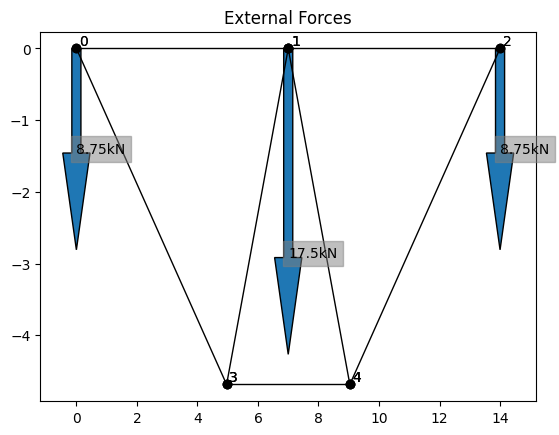

F_0_3 = 12.745205504843538
F_0_1 = -9.26702559404548
N_0_y = 17.5
N_0_x = 0.0
F_1_4 = -9.54022931920687
F_1_3 = -9.540229319206874
F_1_2 = -9.267025594045482
F_2_4 = 12.74520550484354
N_2_y = 17.5
F_3_4 = 13.068798267819446
1283.3806165304266 True


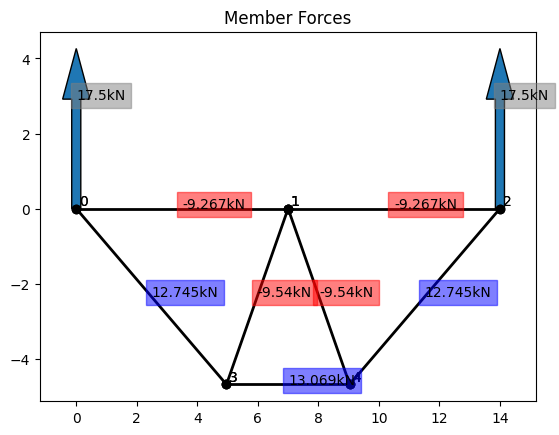

In [2]:
from truss import *

TRAIN_WEIGHT_PER_M = 2.5 # kN/m
BRIDGE_LENGTH = 14 # m

joints = [
    Joint(JointType.PIN, 0, 0, grounded=True),  # 0
    Joint(JointType.GUSSET, 7,  0), # 1
    Joint(JointType.ROLLER, 14, 0, grounded=True), # 2 
    Joint(JointType.GUSSET, 4.96366826e+00, -4.68673544e+00), # 3
    Joint(JointType.GUSSET, 9.03633174e+00 , -4.68673544e+00)] # 4
links = [Link(0, 1), Link(1,2), Link(0,3), Link(1,3), Link(1,4), Link(2,4), Link(3,4)]
# [ 1.19630083e-37  7.00000000e+00  1.40000000e+01  4.96366826e+00
#  9.03633174e+00 -2.46275155e-37 -2.89284683e-37 -6.48450438e-37
# -4.68673544e+00 -4.68673544e+00]
train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1, 2])
forces = [train_force]

truss = Truss(joints, links, forces)
truss.apply_external_forces()

truss.plot("External Forces", plot_external=True, plot_member=False)
cost, success = truss.solve(print_solution=True)
print(cost, success)
truss.plot("Member Forces", plot_external=False, plot_member=True)


## Large Truss

In [2]:
from truss import *

# 42 Unknowns

TRAIN_WEIGHT_PER_M = 5 # kN/m
BRIDGE_LENGTH = 14 # m

joints = [
    Joint(JointType.PIN, 0, 0, grounded=True),  # 0
    Joint(JointType.GUSSET, 10, 0), # 1
    Joint(JointType.GUSSET, 20, 0), # 2
    Joint(JointType.GUSSET, 30, 0), # 3
    Joint(JointType.GUSSET, 40, 0), # 4
    Joint(JointType.GUSSET, 50, 0), # 5
    Joint(JointType.GUSSET, 60, 0), # 6
    Joint(JointType.GUSSET, 70, 0), # 7
    Joint(JointType.GUSSET, 80, 0), # 8
    Joint(JointType.GUSSET, 90, 0), # 9
    Joint(JointType.ROLLER, 100, 0, grounded=True), # 10 
    Joint(JointType.GUSSET, 5, -20), # 11
    Joint(JointType.GUSSET, 15, -20), # 12
    Joint(JointType.GUSSET, 25, -20), # 13
    Joint(JointType.GUSSET, 35, -20), # 14
    Joint(JointType.GUSSET, 45, -20), # 15
    Joint(JointType.GUSSET, 55, -20), # 16
    Joint(JointType.GUSSET, 65, -20), # 17
    Joint(JointType.GUSSET, 76, -20), # 19
    Joint(JointType.GUSSET, 85, -20), # 19
    Joint(JointType.GUSSET, 95, -20)] # 20 
links = [(0,1), (1,2), (2,3), (3,4), (4,5), (5,6), (6,7), (7,8), (8,9), (9,10), (0,11), (1,11), (1,12), (2,12), (2,13), (3,13), (3,14), (4,14), (4,15), (5,15), (5,16), (6,16), (6,17), (7,17), (7,18), (8,18), (8,19), (9,19), (9,20), (10,20), (11,12), (12,13), (13,14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]
multipliers = [1] * len(links)
train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
forces = [train_force]

truss = Truss(joints, links, forces, multipliers)
truss.apply_external_forces()

truss.print_forces()
truss.plot("External Forces", plot_external=True, plot_member=False)
cost, success = truss.solve(print_solution=True)
print(cost, success)
truss.plot("Member Forces", plot_external=False, plot_member=True)

TypeError: expected str, bytes or os.PathLike object, not list

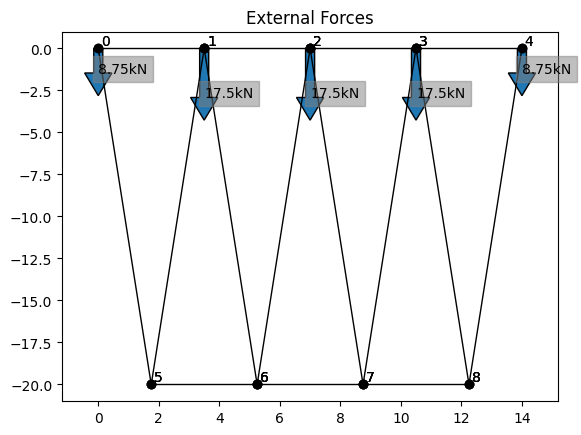

15833.13245848674 False


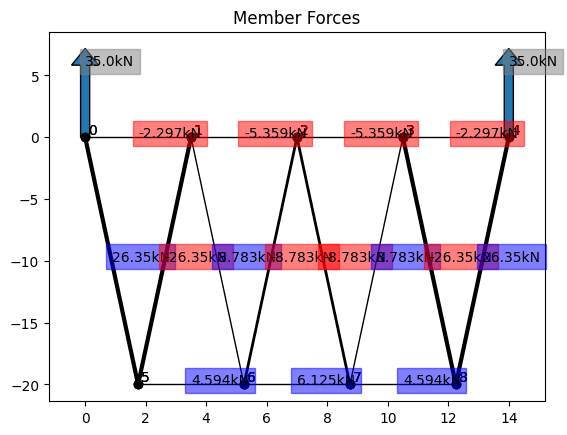

In [3]:
from truss import *

TRAIN_WEIGHT_PER_M = 5 # kN/m
BRIDGE_LENGTH = 14 # m

joints = [
    Joint(JointType.PIN, 0, 0, grounded=True),  # 0
    Joint(JointType.GUSSET, 3.5, 0), # 1
    Joint(JointType.GUSSET, 7, 0), # 2
    Joint(JointType.GUSSET, 10.5, 0), # 3
    Joint(JointType.ROLLER, 14, 0, grounded=True), # 4
    Joint(JointType.GUSSET, 1.75, -20), # 5
    Joint(JointType.GUSSET, 5.25, -20), # 6
    Joint(JointType.GUSSET, 8.75, -20), # 7
    Joint(JointType.GUSSET, 12.25, -20)] # 8
links = [Link(0, 1), Link(1,2), Link(2,3), Link(3,4), Link(0,5), Link(1,5), Link(1,6), Link(2,6), Link(2,7), Link(3,7), Link(3,8), Link(4,8), Link(5,6), Link(6,7), Link(7,8)]
# links = [Link(0, 1), Link(1,2), Link(2,3), Link(3,4), Link(0,5), Link(1,5), Link(2,5), Link(3,5), Link(4,5)]
train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1, 2, 3, 4])
forces = [train_force]

truss = Truss(joints, links, forces)
truss.apply_external_forces()

truss.plot("External Forces", plot_external=True, plot_member=False)
cost, success = truss.solve()
print(cost, success)
truss.plot("Member Forces", plot_external=False, plot_member=True)

/home/owen/truss-optimization/truss.py:210: RuntimeWarning: invalid value encountered in double_scalars
  ux = vx / math.sqrt(vx*vx+vy*vy)
/home/owen/truss-optimization/truss.py:211: RuntimeWarning: invalid value encountered in double_scalars
  uy = vy / math.sqrt(vx*vx+vy*vy)


Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable
Unsolvable

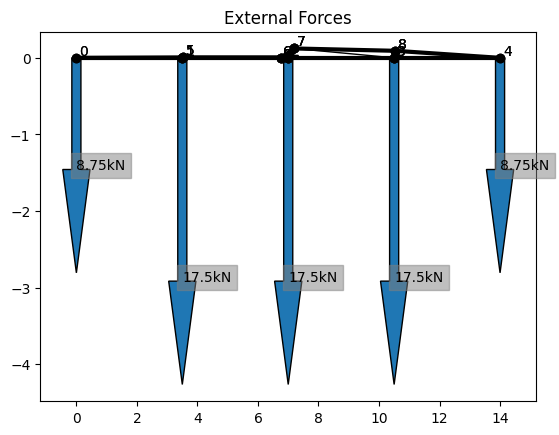

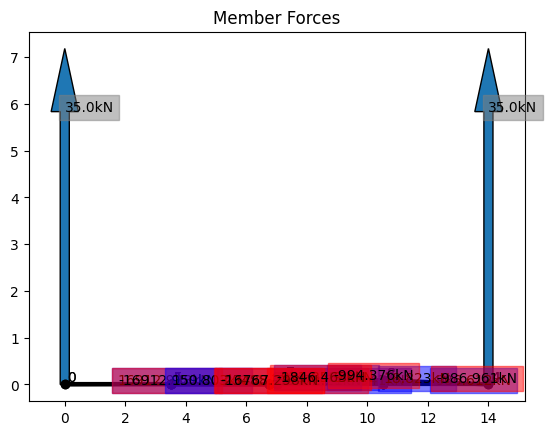

Final Cost: 11528.972670921064 False


In [1]:
from truss import *
from scipy.optimize import minimize, shgo
import random

TRAIN_WEIGHT_PER_M = 5 # kN/m
BRIDGE_LENGTH = 14 # m

def optimize(xs, ys, print_solution = False):
    joints = [
        Joint(JointType.PIN, 0, 0, grounded=True),  # 0
        Joint(JointType.GUSSET, 3.5, 0), # 1
        Joint(JointType.GUSSET, 7, 0), # 2
        Joint(JointType.GUSSET, 10.5, 0), # 3
        Joint(JointType.ROLLER, 14, 0, grounded=True), # 4
        Joint(JointType.GUSSET, xs[0], ys[0]), # 5
        Joint(JointType.GUSSET, xs[1], ys[1]), # 6
        Joint(JointType.GUSSET, xs[2], ys[2]), # 7
        Joint(JointType.GUSSET, xs[3], ys[3])] # 8
    links = [Link(0, 1), Link(1,2), Link(2,3), Link(3,4), Link(0,5), Link(1,5), Link(1,6), Link(2,6), Link(2,7), Link(3,7), Link(3,8), Link(4,8), Link(5,6), Link(6,7), Link(7,8)]
    # links = [Link(0, 1), Link(1,2), Link(2,3), Link(3,4), Link(0,5), Link(1,5), Link(2,5), Link(3,5), Link(4,5)]
    train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1, 2, 3, 4])
    forces = [train_force]

    truss = Truss(joints, links, forces)
    truss.apply_external_forces()

    cost, success = truss.solve(print_solution=print_solution)
    return cost, success, truss 


def optimize_cost(xs):
    # cost, _, _ = optimize([1.75, 5.25, 8.75, 12.25], xs)
    split = np.split(xs, 2)
    cost, _, _ = optimize(split[0], split[1])
    return cost


# cost, success, truss = optimize([1.75, 5.25, 8.75, 12.25], [-10, -10, -10, -10], print_solution=False)
# print(cost, success)
x0 = np.array([1, 2, 3, 4, -5, -5, -5, -5])
res = shgo(optimize_cost, bounds=[(0, 14), (0, 14), (0, 14), (0, 14), (-20, 20), (-20, 20), (-20, 20), (-20, 20)], minimizer_kwargs={"options":{'ftol': 1e-8}}, options={"maxiter" : 100, "maxtime":10})

print(res)

split = np.split(res.x, 2)
cost, success, truss = optimize(split[0], split[1], print_solution=False)

# cost, success, truss = optimize([1.75, 5.25, 8.75, 12.25], res.x, print_solution=False)

truss.plot("External Forces", plot_external=True, plot_member=False)
truss.plot("Member Forces", plot_external=False, plot_member=True)
print("Final Cost: " + str(cost), success)

In [ ]:
from truss import *

truss = Truss(filename="WorkingTrussV7.json")

truss.apply_external_forces()
cost, success = truss.solve()
truss.plot("External Forces", plot_external=True, plot_member=False)
truss.plot("Member Forces", plot_external=False, plot_member=True)
print(cost, success)

In [ ]:
from truss import *

joints = [
	Joint(JointType.ROLLER, 6.999999999999997, 0.0, grounded=True), # 0
	Joint(JointType.GUSSET, 3.445959427112287, -3.823360863943903, grounded=False), # 1
	Joint(JointType.GUSSET, -3.5, 0.0, grounded=False), # 2
	Joint(JointType.GUSSET, -7.225549774371966e-05, -3.8058235067456962, grounded=False), # 3
	Joint(JointType.GUSSET, 0.0, 0.0, grounded=False), # 4
	Joint(JointType.GUSSET, 5.611347433496631, -2.751842065118236, grounded=False), # 5
	Joint(JointType.GUSSET, 1.75, 0.0, grounded=False), # 6
	Joint(JointType.GUSSET, 1.8151622441831856, 1.0266802435131597, grounded=False), # 7
	Joint(JointType.GUSSET, 3.5, 0.0, grounded=False), # 8
	Joint(JointType.GUSSET, 5.25, 0.0, grounded=False), # 9
	Joint(JointType.GUSSET, 5.286578047941056, 1.0201096789634998, grounded=False), # 10
	Joint(JointType.GUSSET, -3.2192423991471504, -3.6967196631081487, grounded=False), # 11
	Joint(JointType.PIN, -7.0, 0.0, grounded=True), # 12
	Joint(JointType.GUSSET, -5.25, 0.0, grounded=False), # 13
	Joint(JointType.GUSSET, -5.242454054194338, 1.0221383581293515, grounded=False), # 14
	Joint(JointType.GUSSET, -1.75, 0.0, grounded=False), # 15
	Joint(JointType.GUSSET, -1.7500000730761478, 1.0184354046013722, grounded=False), # 16
	Joint(JointType.GUSSET, -5.668956799523992, -1.7960413421595094, grounded=False), # 17
]
links = [
	Link(1, 3),
	Link(4, 1),
	Link(1, 5),
	Link(5, 0),
	Link(4, 6),
	Link(6, 7),
	Link(7, 4),
	Link(8, 6),
	Link(8, 7),
	Link(1, 8),
	Link(8, 9),
	Link(0, 9),
	Link(8, 10),
	Link(10, 0),
	Link(9, 10),
	Link(2, 15),
	Link(4, 15),
	Link(3, 11),
	Link(11, 4),
	Link(4, 16),
	Link(16, 2),
	Link(15, 16),
	Link(2, 14),
	Link(2, 13),
	Link(13, 12),
	Link(12, 14),
	Link(11, 2),
	Link(13, 14),
	Link(17, 11),
	Link(17, 12),
	Link(17, 2),
	Link(4, 3),
	Link(8, 5),
]
forces = [
	Force(0.0, -4.375, joints_applied=[0]),
	Force(0.0, -8.75, joints_applied=[6]),
	Force(0.0, -8.75, joints_applied=[8]),
	Force(0.0, -8.75, joints_applied=[9]),
	Force(0.0, -8.75, joints_applied=[4]),
	Force(0.0, -8.75, joints_applied=[13]),
	Force(0.0, -4.375, joints_applied=[12]),
	Force(0.0, -8.75, joints_applied=[2]),
	Force(0.0, -8.75, joints_applied=[15]),
]

truss = Truss(joints, links, forces)
truss.apply_external_forces()
cost, success = truss.solve()
truss.plot("Truss")
print(cost, success)

In [ ]:
from truss import *
from scipy.optimize import minimize, shgo, basinhopping

def optimize(xs):
    split = np.split(xs, 2)
    xs = split[0]
    ys = split[1]
    links = [
        Link(1, 3),
        Link(1, 5),
        Link(5, 0),
        Link(1, 6),
        Link(3, 7),
        Link(7, 2),
        Link(9, 7),
        Link(9, 8),
        Link(9, 2),
        Link(4, 3),
        Link(6, 5),
        Link(8, 2),
        Link(0, 6),
        Link(2, 3),
        Link(3, 6),
        Link(2, 4),
        Link(6, 4),
    ]
    forces = [
        Force(0.0, -8.75, joints_applied=[0]),
        Force(0.0, -17.5, joints_applied=[6]),
        Force(0.0, -17.5, joints_applied=[4]),
        Force(0.0, -8.75, joints_applied=[8]),
        Force(0.0, -17.5, joints_applied=[2]),
    ]
    joints = [
        Joint(JointType.ROLLER, 6.999999999999997, 0.0, grounded=True),
        Joint(JointType.GUSSET, xs[1], ys[1], grounded=False),
        Joint(JointType.GUSSET, -3.5, 0.0, grounded=False),
        Joint(JointType.GUSSET, xs[3], ys[3], grounded=False),
        Joint(JointType.GUSSET, 0.0, 0.0, grounded=False),
        Joint(JointType.GUSSET, xs[5], ys[5], grounded=False),
        Joint(JointType.GUSSET, 3.5, 0.0, grounded=False),
        Joint(JointType.GUSSET, xs[7], ys[7], grounded=False),
        Joint(JointType.PIN, -7.0, 0.0, grounded=True),
        Joint(JointType.GUSSET, xs[9], ys[9], grounded=False),
    ]
    truss = Truss(joints, links, forces)
    truss.apply_external_forces()
    cost, success = truss.solve()
    
    return cost, success, truss

def optimize_(xs):
    cost, _, _ = optimize(xs)
    return cost

x0 = np.array([
	6.999999999999997,
	4.9,
	-3.5,
	0.0,
	0.0,
	6.4,
	3.5,
	-4.1,
	-7.0,
	-6.6000000000000005,
	0.0,
	-4.000000000000001,
	0.0,
	-4.9,
	0.0,
	-2.6,
	0.0,
	-4.000000000000001,
	0.0,
	-1.9000000000000001,
])


cost, success, truss = optimize(x0)
truss.plot("Initial")
print("Initial cost:", cost, "constraints valid:", success)
res = minimize(optimize_, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True, 'maxiter': 2e4})
# res = basinhopping(optimize_, x0, niter=50, minimizer_kwargs={'method': 'nelder-mead', 'options':{'xatol': 1e-5, 'disp': True, 'maxiter': 2e3}})
# shgo(optimize_cost, bounds=[(0, 14), (0, 14), (0, 14), (0, 14), (-20, 20), (-20, 20), (-20, 20), (-20, 20)], minimizer_kwargs={"options":{'ftol': 1e-8}}, options={"maxiter" : 100, "maxtime":10})
cost, success, truss = optimize(res.x)
truss.plot("Final")
truss.print_joints()
print("Final cost:", cost, "constraints valid:", success)


In [ ]:
import sympy as sp
from sympy import *
x = sp.Symbol("x")
e = 2.71828
f = 1/(1+Pow(e,-x))                           # define the function
d = diff(f)
sp.pprint(f)
sp.pprint(d)


In [1]:
from truss import *
import sympy as sp
TRAIN_WEIGHT_PER_M = 4 # kN/m
BRIDGE_LENGTH = 14 # m

joints = [
    Joint(JointType.PIN, 0, 0, grounded=True),  # 0
    Joint(JointType.GUSSET, 7, 0), # 1
    Joint(JointType.ROLLER, 14, 0, grounded=True), # 2 
    Joint(JointType.GUSSET, 3.5, -20), # 3
    Joint(JointType.GUSSET, 10.5, -20)] # 4
links = [Link(0, 1), Link(1,2), Link(0,3), Link(1,3), Link(1,4), Link(2,4), Link(3,4)]

train_force = Force(fx=0, fy=-TRAIN_WEIGHT_PER_M * BRIDGE_LENGTH, joints_applied=[0, 1, 2])
forces = [train_force]

truss = Truss(joints, links, forces)
truss.apply_external_forces()

solution, inputs = truss.generate_symbolic_equations()
print("Solved:", solution)
X = []
for force, eq in solution.items():
    X.append(eq)
    
X_mat = sp.Matrix(X)
print(X_mat, inputs)
jac = X_mat.jacobian(inputs)

print("Jacobian", jac)




KeyboardInterrupt

